In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# import the file
ddi = pd.read_csv('time_series_ddi.csv')

In [25]:
# convert the columns into integer
ddi['net_flows'] = ddi['net_flows'].str.replace(',', '').astype(int)
ddi['investment_income'] = ddi['investment_income'].str.replace(',', '').astype(int)
ddi['investment_position'] = ddi['investment_position'].str.replace(',', '').astype(int)

# convert into year
ddi['year'] = pd.to_datetime(ddi['year'], format='%Y')

In [26]:
# convert the columns into billions
ddi['net_flows'] = ddi['net_flows'] / 1000
ddi['investment_income'] = ddi['investment_income'] / 1000
ddi['investment_position'] = ddi['investment_position'] / 1000

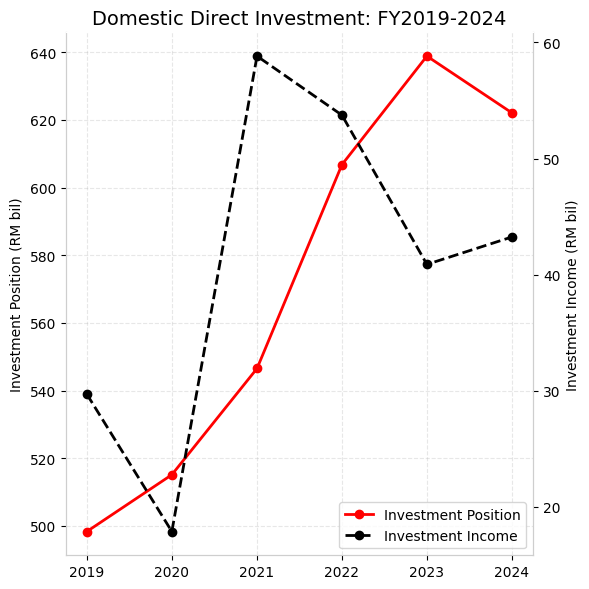

In [46]:
# Filter data from 2019 to 2024
ddi_filter = ddi[ddi['year'] >= '2019-01-01']

# Create combo chart
fig, ax1 = plt.subplots(figsize=(6, 6))

# Create primary y-axis for investment position
ax1.plot(ddi_filter['year'], ddi_filter['investment_position'], 
         color='red', marker='o', linewidth=2, label='Investment Position')
ax1.set_ylabel('Investment Position (RM bil)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Plot investment income on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(ddi_filter['year'], ddi_filter['investment_income'], 
         color='black', marker='o', linestyle='--', linewidth=2, label='Investment Income')
ax2.set_ylabel('Investment Income (RM bil)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Set title
ax1.set_title('Domestic Direct Investment: FY2019-2024', fontsize=14, color='black')

# Set spine colors
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_edgecolor('#cecece')
    ax.spines['top'].set_color('white')

# Add legends
bars1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(bars1 + lines2, labels1 + labels2, loc='lower right')

# Add grid
ax1.grid(True, alpha=0.3, linestyle='--')

# # Get the latest data points
# latest_year = ddi_filter['year'].iloc[-1]
# latest_position = ddi_filter['investment_position'].iloc[-1]
# latest_income = ddi_filter['investment_income'].iloc[-1]

# # Add data callout for investment position (ax1)
# ax1.annotate(f'{latest_position:.0f}', 
#              xy=(latest_year, latest_position),
#              xytext=(-230, 10), textcoords='offset points',
#              bbox=dict(boxstyle='square,pad=0.3', facecolor='black', edgecolor='black'),
#              fontsize=10, color='white')

# # Add data callout for investment income (ax2)
# ax2.annotate(f'{latest_income:.0f}', 
#              xy=(latest_year, latest_income),
#              xytext=(-230, -10), textcoords='offset points',
#              bbox=dict(boxstyle='square,pad=0.3', facecolor='black', edgecolor='black'),
#              fontsize=10, color='white')

# # Add horizontal lines to show latest datapoint levels
# ax1.axhline(y=latest_position, color='black', linestyle='--', alpha=0.7, linewidth=1)
# ax2.axhline(y=latest_income, color='black', linestyle='--', alpha=0.7, linewidth=1)


plt.tight_layout()
plt.show()